# Cleaning/Formatting Flat File Source
For this section, I will work on performing at least 5 data transformation and/or cleansing steps to flat file data.

## Load necessary libraries

In [2]:
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Load the datasets
All of the datasets are downloaded from the [**Federal Reserve Bank of St.Louis**](https://fred.stlouisfed.org/) in as CSV and they contain various kinds of Economic data released by the Federal Reserve. The date range of the datasets is from 01/01/2020 to 09/01/2024 (Not all data is as recent as this date, such as the Industrial Production Tootal Index), the most recent data release date for most of the metrics.

In [4]:
# Define folder path
folder_path = './flat_files'

# List all files in the folder
files = os.listdir(folder_path)

files

['PAYEMS.csv',
 'T10Y3M-noadj.csv',
 'INDPRO.csv',
 'T10YIE.csv',
 'UNRATE.csv',
 'ICSA.csv',
 'FEDFUNDS-noadj.csv',
 'DGS10-noadj.csv',
 'CORESTICKM159SFRBATL.csv',
 'GDP.csv']

In [6]:
# Load the data from the files to the DataFrame

dfs = {} # Initializing the empty dictionary

for file in files:
    file_name = os.path.splitext(file)[0] # Split the file from its extension and get the file name
    file_path = os.path.join(folder_path, file)

    # Store DataFrame in dicionary with file name as the key
    dfs[file_name] = pd.read_csv(file_path)

In [14]:
dfs['GDP'].head()

,DATE,GDP
0,2020-01-01,21727.657
1,2020-04-01,19935.444
2,2020-07-01,21684.551
3,2020-10-01,22068.767
4,2021-01-01,22656.793


## Data Transformations

### Step 1: Column Replacement
The column names of the data source are vague in terms of the representation as they are abbreviations. To make the data more understandable, let's take a look at the column names and update them as necessary.

In [9]:
# Print out the column names of the datasets
for dataset_name, df in dfs.items():
    print(f'{dataset_name}: {df.columns.tolist()}')

CORESTICKM159SFRBATL: ['DATE', 'CORESTICKM159SFRBATL']
DGS10-noadj: ['DATE', 'DGS10']
FEDFUNDS-noadj: ['DATE', 'FEDFUNDS']
GDP: ['DATE', 'GDP']
ICSA: ['DATE', 'ICSA']
INDPRO: ['DATE', 'INDPRO']
PAYEMS: ['DATE', 'PAYEMS']
T10Y3M-noadj: ['DATE', 'T10Y3M']
T10YIE: ['DATE', 'T10YIE']
UNRATE: ['DATE', 'UNRATE']


Most of the economic data are seasonally adjusted, removing the pattern casued by seasonality, whereas a few of the data does not have seasonality adjustment, such as the federal funds effective rate. It is so because the data is a short-term interest rate that responds quickly to changes in economic conditions, particularly due to monetary policy actions by the Federal Reserve. To distinguish them, I have mannually updated the file names after the download and added the 'noadj' as suffix.

Let's now create a dictionary for each DataFrame where the keys are the original column names and the values are the new column names that we want to change to. I will use the format of **report_frequency_dataname_unit<_noadj>**, in short formed names.

In [11]:
rename_dict = {
    'UNRATE' : {'UNRATE': 'mthly_unemplmnt_prct'},
    'PAYEMS' : {'PAYEMS': 'mthly_totnonfrm_thousnds'},
    'INDPRO' : {'INDPRO': 'mthly_industrprodindx'},
    'FEDFUNDS-noadj': {'FEDFUNDS': 'mthly_fedfundintrst_prct_noadj'},
    'GDP': {'GDP': 'qrtly_gdp_billions'},
    'ICSA': {'ICSA': 'wkly_initjoblessclm'},
    'DGS10-noadj': {'DGS10': 'dly_10yrtrsryyield_prct_noadj'},
    'T10Y3M-noadj': {'T10Y3M': 'dly_10yr3mthtrsrydiff_prct_noadj'},
    'CORESTICKM159SFRBATL': {'CORESTICKM159SFRBATL': 'mthly_yoystkycpilessfoodandenergy_prct'},
    'T10YIE': {'T10YIE': 'dly_10yrbreakeveninflation_prct'}
}

In [12]:
# Loop through the DataFrames and apply the renaming
for dataset_name, df in dfs.items():
    if dataset_name in rename_dict:
        df.rename(columns = rename_dict[dataset_name], inplace=True)

In [13]:
# Lastly, let's change the 'DATE' column to lower case
general_rename_dict = {'DATE': 'date'}

for dataset_name, df in dfs.items():
    df.rename(columns = general_rename_dict, inplace = True)

In [14]:
# Check the updated column names
for dataset_name, df in dfs.items():
    print(f'{dataset_name}: {df.columns.tolist()}')

CORESTICKM159SFRBATL: ['date', 'mthly_yoystkycpilessfoodandenergy_prct']
DGS10-noadj: ['date', 'dly_10yrtrsryyield_prct_noadj']
FEDFUNDS-noadj: ['date', 'mthly_fedfundintrst_prct_noadj']
GDP: ['date', 'qrtly_gdp_billions']
ICSA: ['date', 'wkly_initjoblessclm']
INDPRO: ['date', 'mthly_industrprodindx']
PAYEMS: ['date', 'mthly_totnonfrm_thousnds']
T10Y3M-noadj: ['date', 'dly_10yr3mthtrsrydiff_prct_noadj']
T10YIE: ['date', 'dly_10yrbreakeveninflation_prct']
UNRATE: ['date', 'mthly_unemplmnt_prct']


### Step 2: Data Type Conversion
Now that we have changed the column names to more human-readable format, let's make sure the data types of each column is in proper format and update otherwise.

In [16]:
# Check the data type of each column of the dataframes
for dataset_name, df in dfs.items():
    print(f"Data types in '{dataset_name}':")
    print(df.dtypes)
    print('\n')

Data types in 'CORESTICKM159SFRBATL':
date                                       object
mthly_yoystkycpilessfoodandenergy_prct    float64
dtype: object


Data types in 'DGS10-noadj':
date                             object
dly_10yrtrsryyield_prct_noadj    object
dtype: object


Data types in 'FEDFUNDS-noadj':
date                               object
mthly_fedfundintrst_prct_noadj    float64
dtype: object


Data types in 'GDP':
date                   object
qrtly_gdp_billions    float64
dtype: object


Data types in 'ICSA':
date                   object
wkly_initjoblessclm     int64
dtype: object


Data types in 'INDPRO':
date                      object
mthly_industrprodindx    float64
dtype: object


Data types in 'PAYEMS':
date                        object
mthly_totnonfrm_thousnds     int64
dtype: object


Data types in 'T10Y3M-noadj':
date                                object
dly_10yr3mthtrsrydiff_prct_noadj    object
dtype: object


Data types in 'T10YIE':
date                  

Obviously, there are a few columns that we need to change the data type, especially the date column of each dataframe. 

In [18]:
# Convert the date column to datetime format
for dataset_name, df in dfs.items():
    if 'date' in df.columns and df['date'].dtype == 'object':
        df['date'] = pd.to_datetime(df['date'], format ='%Y-%m-%d', errors = 'raise')
        print(f"Converted 'date' column to datetime in '{dataset_name}'")

Converted 'date' column to datetime in 'CORESTICKM159SFRBATL'
Converted 'date' column to datetime in 'DGS10-noadj'
Converted 'date' column to datetime in 'FEDFUNDS-noadj'
Converted 'date' column to datetime in 'GDP'
Converted 'date' column to datetime in 'ICSA'
Converted 'date' column to datetime in 'INDPRO'
Converted 'date' column to datetime in 'PAYEMS'
Converted 'date' column to datetime in 'T10Y3M-noadj'
Converted 'date' column to datetime in 'T10YIE'
Converted 'date' column to datetime in 'UNRATE'


In [20]:
# Convert a few of the object typed columns to float as they represent the percentage 
columns_to_convert = {
    'DGS10-noadj': ['dly_10yrtrsryyield_prct_noadj'],
    'T10Y3M-noadj': ['dly_10yr3mthtrsrydiff_prct_noadj'],
    'T10YIE': ['dly_10yrbreakeveninflation_prct']
}

for dataset_name, cols in columns_to_convert.items():
    if dataset_name in dfs:
        df = dfs[dataset_name]
        for col in cols:
            if df[col].dtype == 'object':
                df[col] = pd.to_numeric(df[col], errors = 'coerce')
                print(f"Converted column '{col}' to float in '{dataset_name}'")
        dfs[dataset_name] = df # Write back the changes to the dataframes in the dictionary

Converted column 'dly_10yrtrsryyield_prct_noadj' to float in 'DGS10-noadj'
Converted column 'dly_10yr3mthtrsrydiff_prct_noadj' to float in 'T10Y3M-noadj'
Converted column 'dly_10yrbreakeveninflation_prct' to float in 'T10YIE'


In [22]:
# Check the updated data
for dataset_name, df in dfs.items():
    print(f"Head of the data in '{dataset_name}':")
    print(df.head())
    print('\n')

Head of the data in 'CORESTICKM159SFRBATL':
        date  mthly_yoystkycpilessfoodandenergy_prct
0 2020-01-01                                2.790484
1 2020-02-01                                2.800101
2 2020-03-01                                2.606553
3 2020-04-01                                2.179323
4 2020-05-01                                2.014140


Head of the data in 'DGS10-noadj':
        date  dly_10yrtrsryyield_prct_noadj
0 2020-01-02                           1.88
1 2020-01-03                           1.80
2 2020-01-06                           1.81
3 2020-01-07                           1.83
4 2020-01-08                           1.87


Head of the data in 'FEDFUNDS-noadj':
        date  mthly_fedfundintrst_prct_noadj
0 2020-01-01                            1.55
1 2020-02-01                            1.58
2 2020-03-01                            0.65
3 2020-04-01                            0.05
4 2020-05-01                            0.05


Head of the data in 'GDP'

### Step 3: Find Duplicates
Since the Economic data coems from the Federal Reserve at different frequencies, there could be duplicated records if there's any data entry error or other type of errors. Let's check the duplicates now. Since all the data are time-series-based and only has one numeric column, we only need to check the date column for duplicates.

In [27]:
for dataset_name, df in dfs.items():
    duplicate_count = df[df.duplicated(subset = 'date', keep=False)] # Use the keep=False parameter to get all duplicates
    num_duplicates = duplicate_count.shape[0]
    print(f"Dataset '{dataset_name}' has {num_duplicates} duplicates based on the 'date' column.")

Dataset 'CORESTICKM159SFRBATL' has 0 duplicates based on the 'date' column.
Dataset 'DGS10-noadj' has 0 duplicates based on the 'date' column.
Dataset 'FEDFUNDS-noadj' has 0 duplicates based on the 'date' column.
Dataset 'GDP' has 0 duplicates based on the 'date' column.
Dataset 'ICSA' has 0 duplicates based on the 'date' column.
Dataset 'INDPRO' has 0 duplicates based on the 'date' column.
Dataset 'PAYEMS' has 0 duplicates based on the 'date' column.
Dataset 'T10Y3M-noadj' has 0 duplicates based on the 'date' column.
Dataset 'T10YIE' has 0 duplicates based on the 'date' column.
Dataset 'UNRATE' has 0 duplicates based on the 'date' column.


Fortunately, there is no duplicate in all of the dataframes.

### Step 4: Handling Null Values
Now let's check the number of null values in each column of the dataframes and decide on how we should handle them acccordingly.

In [44]:
for dataset_name, df in dfs.items():
    null_counts = df.isnull().sum() # Count the number of null values of each column of the datadrames
    total_rows = df.shape[0]
    null_percentage = (null_counts / total_rows) * 100

    if null_counts.any() > 0:
        print(f"Null values counts and percenategs for dataset '{dataset_name}':")
        null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
        print(null_info[null_info['Null Count'] > 0])
        print('\n')

Null values counts and percenategs for dataset 'DGS10-noadj':
                               Null Count  Null Percentage
dly_10yrtrsryyield_prct_noadj          48         3.944125


Null values counts and percenategs for dataset 'T10Y3M-noadj':
                                  Null Count  Null Percentage
dly_10yr3mthtrsrydiff_prct_noadj          42         4.026846


Null values counts and percenategs for dataset 'T10YIE':
                                 Null Count  Null Percentage
dly_10yrbreakeveninflation_prct          48         3.944125




Now let's validate against the source data to make sure there is no data integrity issue between the CSV file generation vs. the source data from the Federal Reserve.

In [47]:
for dataset_name, df in dfs.items():
    null_rows = df[df.isnull().any(axis=1)]

    if not null_rows.empty:
        sampled_rows = null_rows.sample(n=5, random_state=42)
        print(f"Sampled 5 rows with nulls from '{dataset_name}':")
        print(sampled_rows)
        print('\n')

Sampled 5 rows with nulls from 'DGS10-noadj':
           date  dly_10yrtrsryyield_prct_noadj
722  2022-10-10                            NaN
1037 2023-12-25                            NaN
697  2022-09-05                            NaN
1077 2024-02-19                            NaN
642  2022-06-20                            NaN


Sampled 5 rows with nulls from 'T10Y3M-noadj':
          date  dly_10yr3mthtrsrydiff_prct_noadj
652 2022-07-04                               NaN
367 2021-05-31                               NaN
235 2020-11-26                               NaN
697 2022-09-05                               NaN
131 2020-07-03                               NaN


Sampled 5 rows with nulls from 'T10YIE':
           date  dly_10yrbreakeveninflation_prct
722  2022-10-10                              NaN
1037 2023-12-25                              NaN
697  2022-09-05                              NaN
1077 2024-02-19                              NaN
642  2022-06-20                          

I validated against the data from the Federal Reserve website (hyperlinked in the beginning of this project), and found they are indeed non-existing for those dates. Therefore, we are fine to leave them as nulls.

### Step 5: Checking Outliers
Although the data released by the Federal Reserve is public and they are major data points of the Economy thus not likely to have data entry errors, let's still check the outliers.

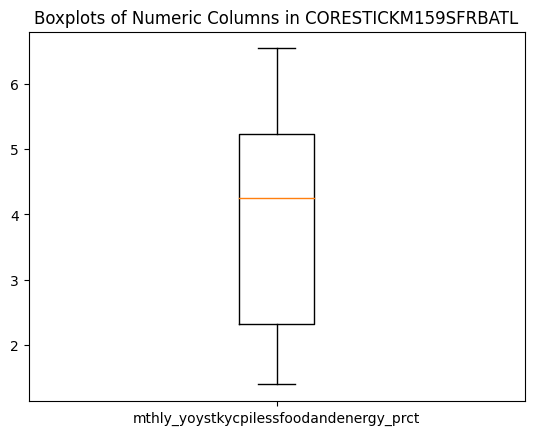

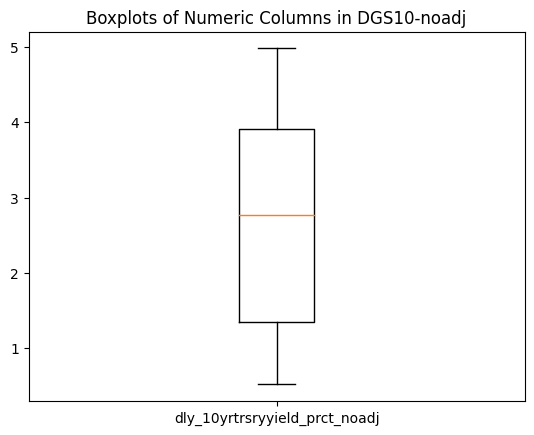

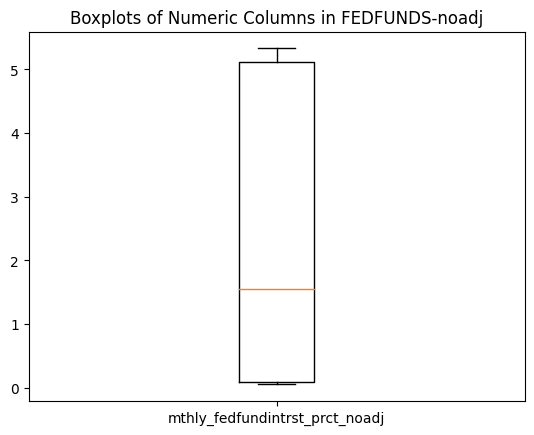

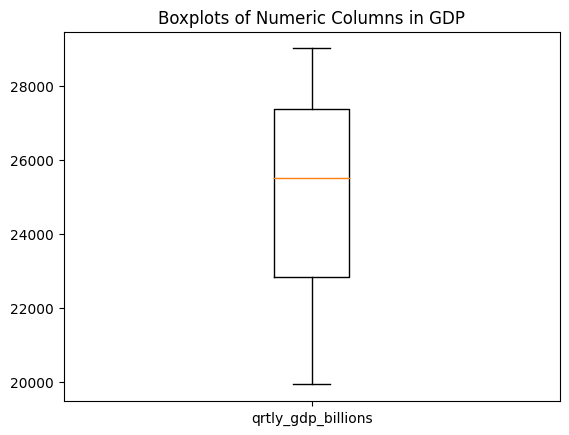

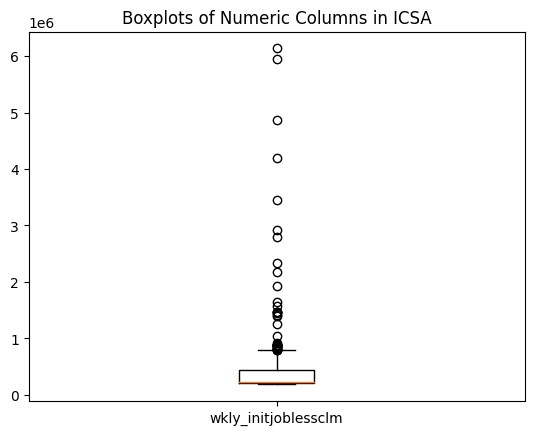

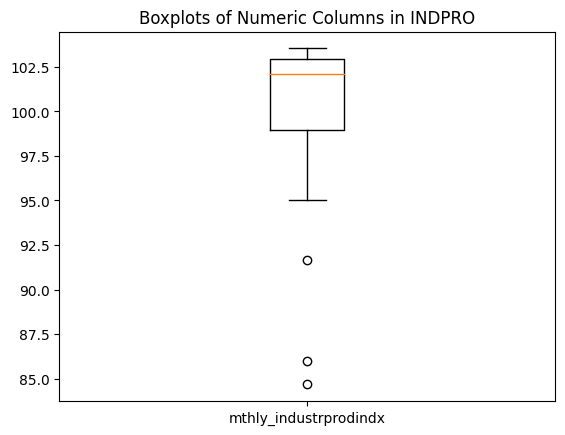

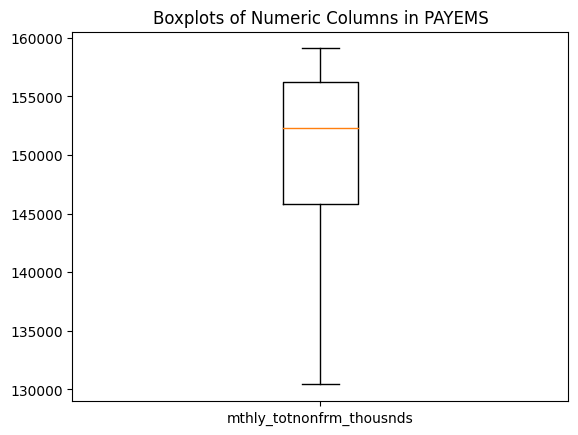

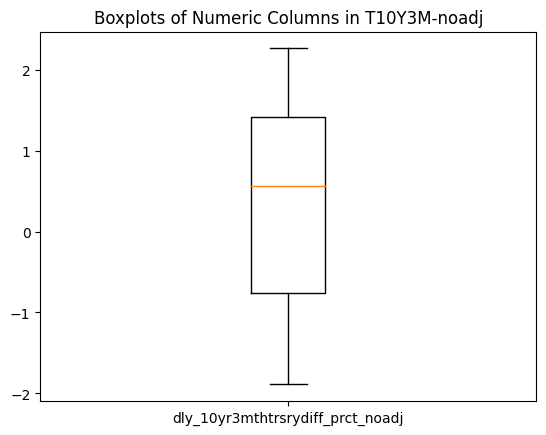

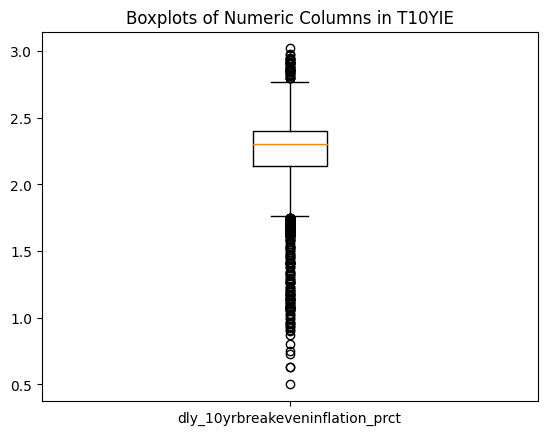

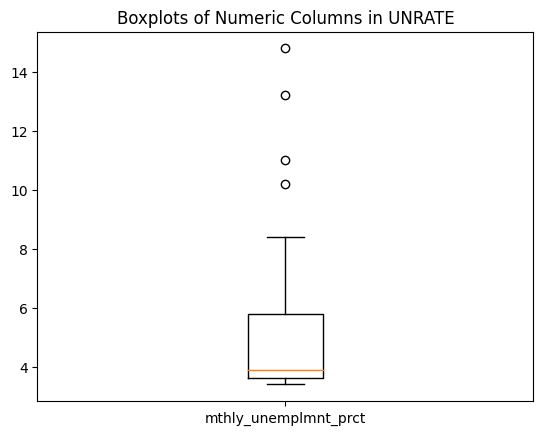

In [82]:
for dataset_name, df in dfs.items():
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

    if numeric_columns:
        valid_data = []

        for col in numeric_columns:
            clean_data = df[col].dropna()
            valid_data.append(clean_data)
        
        plt.boxplot(valid_data, labels=numeric_columns)
        plt.title(f"Boxplots of Numeric Columns in {dataset_name}")
        plt.show()

According to the plots, ICSA, INDPRO, T10YIE and UNRATE has outliers. They are most likely due to natural reasons. Let's take a look at the ICSA to explore a little.

In [87]:
# Let's query some of the outlier example based on the chart
dfs['ICSA'][dfs['ICSA']['wkly_initjoblessclm'] >= 5e6] 

,date,wkly_initjoblessclm
12,2020-03-28,5946000
13,2020-04-04,6137000


The two extremes is very resonable given the fact they were during the Covid breakout periods. I validated by Google Search and did find similar number from the [**Department of Labor website**](https://www.dol.gov/sites/dolgov/files/OPA/newsreleases/ui-claims/20200551.pdf).

### Step 6: Merging/Joinining DataFrames
The dataframes have different date granularities, as some of the data are released monthly, some weekly, and some quarterly. Monthly and quarterly data are released first day of the month, and daily data does not have data for every day. Since the end goal of the project is to analyze the impact of Economic, world data, as well as technical indicators on the performance of stock price, the Economic data should be used in the right join for analysis. As a result, we could create a date column as the base table and left join all the dataframes to be used later with the stock data.

In [97]:
# Create the base dataframe
date_range = pd.date_range(start = '2020-01-01', end = '2024-09-01', freq = 'D')
df_econ = pd.DataFrame({'date': date_range})
print(f'Dimension of the date dateframe: {df_econ.shape}')
df_econ.head()

Dimension of the date dateframe: (1706, 1)


,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [99]:
# Perform left joins with all DataFrames in the dfs dictionary
for dataset_name, df in dfs.items():
    df_econ = df_econ.merge(df, on = 'date', how='left')

print(f'Dimension of the joined dateframe: {df_econ.shape}')
df_econ.head()

Dimension of the joined dateframe: (1706, 11)


,date,mthly_yoystkycpilessfoodandenergy_prct,dly_10yrtrsryyield_prct_noadj,mthly_fedfundintrst_prct_noadj,qrtly_gdp_billions,wkly_initjoblessclm,mthly_industrprodindx,mthly_totnonfrm_thousnds,dly_10yr3mthtrsrydiff_prct_noadj,dly_10yrbreakeveninflation_prct,mthly_unemplmnt_prct
0,2020-01-01,2.790484,NaN,1.55,21727.657,NaN,101.3372,152045.0,NaN,NaN,3.6
1,2020-01-02,NaN,1.88,NaN,NaN,NaN,NaN,NaN,0.34,1.80,NaN
2,2020-01-03,NaN,1.80,NaN,NaN,NaN,NaN,NaN,0.28,1.77,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,222000.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Let's check the summary of the new dataframe
df_econ.describe()

,date,mthly_yoystkycpilessfoodandenergy_prct,dly_10yrtrsryyield_prct_noadj,mthly_fedfundintrst_prct_noadj,qrtly_gdp_billions,wkly_initjoblessclm,mthly_industrprodindx,mthly_totnonfrm_thousnds,dly_10yr3mthtrsrydiff_prct_noadj,dly_10yrbreakeveninflation_prct,mthly_unemplmnt_prct
count,1706,56.000000,1169.000000,57.000000,18.000000,2.440000e+02,56.000000,57.000000,1001.000000,1169.000000,57.000000
mean,2022-05-02 12:00:00,3.949326,2.586168,2.346140,25149.571833,5.139139e+05,100.379991,150697.350877,0.369750,2.180231,4.989474
min,2020-01-01 00:00:00,1.400569,0.520000,0.050000,19935.444000,1.870000e+05,84.681200,130421.000000,-1.890000,0.500000,3.400000
25%,2021-03-02 06:00:00,2.330213,1.350000,0.090000,22834.810000,2.130000e+05,98.950000,145822.000000,-0.760000,2.140000,3.600000
50%,2022-05-02 12:00:00,4.253590,2.770000,1.550000,25510.641000,2.280000e+05,102.075800,152309.000000,0.560000,2.300000,3.900000
75%,2023-07-02 18:00:00,5.228251,3.910000,5.120000,27381.451000,4.475000e+05,102.918275,156211.000000,1.420000,2.400000,5.800000
max,2024-09-01 00:00:00,6.538167,4.980000,5.330000,29016.714000,6.137000e+06,103.532600,159105.000000,2.270000,3.020000,14.800000
std,NaN,1.643005,1.382620,2.342017,2764.000185,7.781930e+05,3.976661,6867.062757,1.148131,0.417416,2.405253


In [107]:
# Validate against the original non-null count to make sure no data loss during the join
for dataset_name, df in dfs.items():
    print(f"Non-null value count for dataset '{dataset_name}':")
    non_null_count = df.notnull().sum()
    print(non_null_count, '\n')

Non-null value count for dataset 'CORESTICKM159SFRBATL':
date                                      56
mthly_yoystkycpilessfoodandenergy_prct    56
dtype: int64 

Non-null value count for dataset 'DGS10-noadj':
date                             1217
dly_10yrtrsryyield_prct_noadj    1169
dtype: int64 

Non-null value count for dataset 'FEDFUNDS-noadj':
date                              57
mthly_fedfundintrst_prct_noadj    57
dtype: int64 

Non-null value count for dataset 'GDP':
date                  18
qrtly_gdp_billions    18
dtype: int64 

Non-null value count for dataset 'ICSA':
date                   244
wkly_initjoblessclm    244
dtype: int64 

Non-null value count for dataset 'INDPRO':
date                     56
mthly_industrprodindx    56
dtype: int64 

Non-null value count for dataset 'PAYEMS':
date                        57
mthly_totnonfrm_thousnds    57
dtype: int64 

Non-null value count for dataset 'T10Y3M-noadj':
date                                1043
dly_10yr3mthtrsrydif

I will leave the Nulls as they are based on the analysis before, for purporse of joining with the stock data later in this project.

### Ethical Implications of the Data Wrangling

In preparing economic datasets from the Federal Reserve Bank of St.Louis, I performed several data transformations, including renaming columns to make them more interpretable, converting data types for numerical accuracy, handling duplicates/outliers/missing values, and finally merging the datasets based on the date values. The data was sourced from a credible and publicly available institution, ensuring it was acquired in an ethical manner and conforms to legal standards related to public economic data. However, care must be taken during transformations, as modifying or interpreting the data without a clear understanding of the metrics could lead to misrepresentation. For example, distinguishing seasonally adjusted data from non-seasonally adjusted data required renaming conventions that were applied manually. This assumption could introduce the risk of incorrect/misleading labeling, which would impact analysis and decision-making. To mitigate such risks, I documentated the manual transformation with reasonings behind it. No proprietary data was used, and all data manipulation steps followed ethical data handling principles with validation evidence, aligning with transparency and reproducibility guidelines.